In [136]:
import pandas as pd
import numpy as np 
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_features
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [138]:
data = pd.read_csv('processed/processed_data/2016-06-30---2019-10-03---1d---oc/AEE.csv')
len(data)

821

In [139]:
windowed_data = pd.DataFrame()
y = []

for el in range(0, 800):
    example = data.iloc[el:el + 5]
    example['example_id'] = el
    windowed_data = windowed_data.append(example)
    y.append(example.iloc[-1]['class'])


In [140]:
windowed_data.head(30)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,class,example_id
0,0,2016-06-29,52.270000,52.689999,52.119999,52.500000,47.019478,1767900,0.0,0
1,1,2016-06-30,52.639999,53.590000,52.470001,53.580002,47.986740,2390700,0.0,0
2,2,2016-07-01,53.770000,53.930000,53.160000,53.750000,48.138996,1518300,1.0,0
3,3,2016-07-05,53.750000,54.080002,53.599998,53.759998,48.147945,3291200,0.0,0
4,4,2016-07-06,53.759998,53.910000,53.090000,53.770000,48.156902,2390600,0.0,0
1,1,2016-06-30,52.639999,53.590000,52.470001,53.580002,47.986740,2390700,0.0,1
2,2,2016-07-01,53.770000,53.930000,53.160000,53.750000,48.138996,1518300,1.0,1
3,3,2016-07-05,53.750000,54.080002,53.599998,53.759998,48.147945,3291200,0.0,1
4,4,2016-07-06,53.759998,53.910000,53.090000,53.770000,48.156902,2390600,0.0,1
5,5,2016-07-07,53.630001,53.630001,52.470001,52.650002,47.153824,2643200,1.0,1


In [141]:
y_series = pd.Series(y)
windowed_data = windowed_data.drop(['Unnamed: 0', 'Date', 'class'], axis=1)


In [142]:
windowed_data

,Open,High,Low,Close,Adj Close,Volume,example_id
0,52.270000,52.689999,52.119999,52.500000,47.019478,1767900,0
1,52.639999,53.590000,52.470001,53.580002,47.986740,2390700,0
2,53.770000,53.930000,53.160000,53.750000,48.138996,1518300,0
3,53.750000,54.080002,53.599998,53.759998,48.147945,3291200,0
4,53.759998,53.910000,53.090000,53.770000,48.156902,2390600,0
...,...,...,...,...,...,...,...
799,77.220001,78.510002,76.959999,78.489998,77.008980,2371500,799
800,78.639999,78.879997,77.970001,78.489998,77.008980,1105100,799
801,78.169998,78.410004,77.019997,77.139999,75.684448,1372100,799
802,77.279999,77.449997,75.680000,76.190002,74.752380,1964000,799


In [144]:
extracted_features = extract_features(windowed_data, column_id="example_id")

Feature Extraction: 100%|██████████| 10/10 [02:25<00:00, 14.51s/it]


In [146]:
impute(extracted_features)
features_filtered = select_features(extracted_features, y_series)

In [88]:
full_dataset = features_filtered
full_dataset['y'] = y_series

In [105]:
y_corr = full_dataset.drop("y", axis=1).apply(lambda x: x.corr(full_dataset.y))


In [106]:
self_corr = full_dataset.drop("y", axis=1).corr()

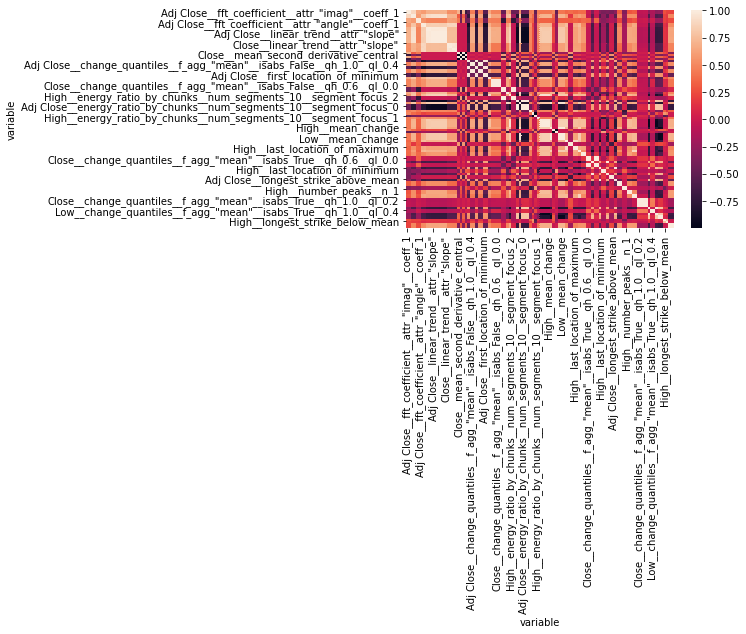

In [111]:
ax = sns.heatmap(
    self_corr
)

In [148]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(features_filtered, y_series, test_size=0.20, random_state=27)


In [149]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)


KNeighborsClassifier()

In [150]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)


In [152]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))

0.71875
0.6875


In [135]:
y_train

248    1.0
496    0.0
245    1.0
454    0.0
389    1.0
      ... 
312    1.0
31     1.0
328    0.0
184    1.0
19     0.0
Length: 400, dtype: float64